# Rental Apartments in Nairobi

## This is a small project that aims as getting the average prices of rent of rental apartments using sampling techniques.

## Sampling technique used here is stratification sampling

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# Print out dataframe
rent = pd.read_csv('clean_rent.csv')
rent

,Unnamed: 0,Agency,Neighborhood,Price
0,18,Kitheka Musyoka,"nyali road, nyali road, Nyali Area, Nyali",12000.0
1,22,Kitheka Musyoka,"fisharies, mtambo bamburi road, Bamburi, Kisauni",13000.0
2,21,Homekenya24,"Ruaka, Kiambaa",13000.0
3,20,Estate Masters Limited,"MUIRU, Ruaka, Kiambaa",13000.0
4,19,Real Management Services 2002Limited,"Sports Road, Waiyaki Way, Westlands",13000.0
...,...,...,...,...
1843,34,Origin Homes,"General Mathenge, Westlands",200000.0
1844,94,Westside Real Estate,"Muringa Road, Kilimani, Dagoretti North",200000.0
1845,14,Yellow Market,"Riverside Drive, Riverside, Westlands",220000.0
1846,158,Serene Valley Apartments,"Kiambere Road, Upper Hill, Langata",240000.0


### Cleaning was done on KMeans notebook, so we will go straight to sampling

# sampling

-> We will use stratification sampling

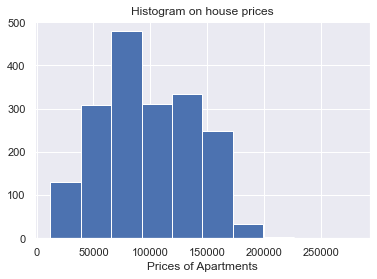

<Figure size 1080x720 with 0 Axes>

In [14]:
# Lets plot the prices without sampling to have an idea on the average prices
plt.hist(rent['Price'], bins=10)
plt.xlabel('Prices of Apartments')
plt.title('Histogram on house prices')
plt.figure(figsize=(15,10))
plt.show()

The average price is around 80,000-100,000 Ksh

In [16]:
# Calculate mathematically
rent['Price'].mean()

97343.88149350649

The mean is exactly 97,340 ksh.

Lets try getting this value using samples

In [18]:
# Stratified Sampling

# get count of values of rent
rent['Price'].value_counts()

100000.0    137
120000.0    118
150000.0    113
90000.0     109
75000.0     101
           ... 
128000.0      1
133000.0      1
76000.0       1
19000.0       1
52500.0       1
Name: Price, Length: 112, dtype: int64

In [19]:
# In decimal values
rent['Price'].value_counts(normalize=True)

100000.0    0.074134
120000.0    0.063853
150000.0    0.061147
90000.0     0.058983
75000.0     0.054654
              ...   
128000.0    0.000541
133000.0    0.000541
76000.0     0.000541
19000.0     0.000541
52500.0     0.000541
Name: Price, Length: 112, dtype: float64

We will try to get stratas that match those decimal places

Size of sample = 320

In [27]:
rent_sample = rent.groupby(['Price'], group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.18))
rent_sample

,Unnamed: 0,Agency,Neighborhood,Price
4,19,Real Management Services 2002Limited,"Sports Road, Waiyaki Way, Westlands",13000.0
8,26,Royani Properties Limited,"Kiambu Road, Kiambu Road",15000.0
14,36,Cfs Homes,"Ruaka, Kiambaa",16000.0
20,40,Estate Masters Limited,"Ruaka, Kiambaa",17000.0
23,44,Kitheka Musyoka,"Bombolulu, Mombasa malindi road, Nyali Area, N...",18000.0
...,...,...,...,...
1817,1819,Buy Rent Shelters,"General Mathenge, Westlands Area, Westlands",175000.0
1816,1822,Capstone Properties,"Parklands, Westlands",175000.0
1840,1831,Coralinternational Ltd,"Wood Avenue, Kilimani, Dagoretti North",180000.0
1834,1842,Origin Homes,"Brookside, Westlands",180000.0


Our sample has 321 records which is 1 record above our intended target. This will do.

In [30]:
rent_sample['Price'].value_counts(normalize=True)

100000.0    0.077882
120000.0    0.065421
90000.0     0.062305
150000.0    0.062305
130000.0    0.056075
75000.0     0.056075
80000.0     0.046729
85000.0     0.043614
65000.0     0.043614
110000.0    0.043614
160000.0    0.040498
70000.0     0.040498
140000.0    0.034268
60000.0     0.028037
95000.0     0.028037
55000.0     0.028037
45000.0     0.021807
170000.0    0.021807
40000.0     0.018692
50000.0     0.015576
115000.0    0.015576
35000.0     0.012461
125000.0    0.012461
135000.0    0.009346
180000.0    0.009346
30000.0     0.009346
165000.0    0.009346
175000.0    0.009346
25000.0     0.006231
38000.0     0.006231
145000.0    0.006231
28000.0     0.006231
20000.0     0.006231
105000.0    0.003115
98000.0     0.003115
18000.0     0.003115
155000.0    0.003115
13000.0     0.003115
17000.0     0.003115
24000.0     0.003115
52000.0     0.003115
88000.0     0.003115
48000.0     0.003115
15000.0     0.003115
78000.0     0.003115
22000.0     0.003115
16000.0     0.003115
43000.0     0

# Analysis

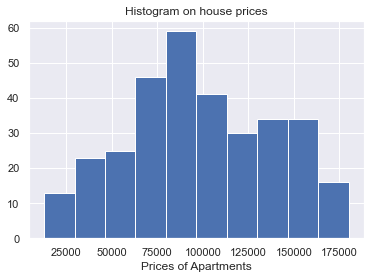

<Figure size 1080x720 with 0 Axes>

In [31]:
# Histogram that plots the sample of house prices
plt.hist(rent_sample['Price'], bins=10)
plt.xlabel('Prices of Apartments')
plt.title('Histogram on house prices')
plt.figure(figsize=(15,10))
plt.show()

In [32]:
rent_sample['Price'].mean()

97629.28348909658

-> The average of the sample of rental prices is 97, 630 Ksh, therefore our sample was a success!